[Auto-Sklearn](https://www.automl.org/automl/auto-sklearn/) is a library for automatic machine learning developed by [AutoML group](https://www.automl.org/) from Freibug-Hannover, Germany.
# Generate tabular classification prediction using auto-sklearn 2
Main components of the library:
```python
# Import libraries
import autosklearn.experimental.askl2
import autosklearn.metrics

# Configure model parameters
classifier = autosklearn.experimental.askl2.AutoSklearn2Classifier(
    time_left_for_this_task = 600, # in seconds
    metric = autosklearn.metrics.roc_auc)

# Fit model
classifier.fit(X_train, y_train)

# Predict on test data
y_pred = classifier.predict(X_test)
```

To find out more about other auto-sklearn applications, visit the [examples webpage](https://automl.github.io/auto-sklearn/master/examples/index.html).

This notebook is available on [GitHub](https://github.com/TomPham97/Kaggle-machine-learning/blob/main/Titanic-competition/2022-08-22-auto-sklearn-2-titanic.ipynb) or to be downloaded [here](/assets/posts/askl2/2022-08-22-auto-sklearn-2-titanic.ipynb).

Note: to install auto-sklearn on MacOS, use the commands below. Additional details can be found in [this comment](https://gist.github.com/simonprovost/051952533680026b67fa58c3552b8a7b?permalink_comment_id=4239572#gistcomment-4239572).
```bash
brew install swig
brew link swig
pip install -U auto-sklearn
```

## Download the dataset from Kaggle
The dataset being used is from the [Kaggle Titanic competition](https://www.kaggle.com/competitions/titanic).

In [3]:
import fastkaggle
print("fastkaggle version: ", fastkaggle.__version__)

fastkaggle version:  0.0.7


In [4]:
comp = 'titanic' # competition name
path = fastkaggle.setup_comp(comp,
                  install = 'fastai "timm >= 0.6.2.dev0"')

In [5]:
# Import basic dependencies such as np, pd
import fastai
from fastai.imports import *
print("fastai version: ", fastai.__version__)

fastai version:  2.7.9


In [6]:
!ls {path}

gender_submission.csv  test.csv  train.csv


## Process and clean the data
Additional transformation and normalization are handled by
auto-sklearn 2.

In [7]:
df = pd.read_csv(path/'train.csv', index_col = 'PassengerId')
df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                            Name     Sex  \
PassengerId                                                                
1                                        Braund, Mr. Owen Harris    male   
2            Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female   
3                                         Heikkinen, Miss. Laina  female   
4                   Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
5                                       Allen, Mr. William Henry    male   

              Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                                
1            22.0      1      0         A/5 21171   7.2500   NaN        S  
2            38.0      1      0          PC 17599  71.2833   C85        C  
3            26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
4            35.0      1      0            113803  53.1000  C123        S  
5            35.0      0      0            373450   8.0500   NaN        S

Define data features `X_train` and label `y_train`.

In [8]:
y_train = df['Survived']
X_train = df.drop(['Survived', 'Name'], axis = 1)

Since auto-sklearn 2 does not accept string columns, it is necessary to convert them into categorical columns.

In [9]:
# Create a function that finds categorical columns and label them as such

def to_cat(df = df):
    '''
    Convert string-type columns of a dataframe into categorical columns
    '''
    # Identify string/categorical columns in the dataframe
    cols = df.select_dtypes(include = 'object')
    
    # Convert to categorical type using for loops
    for col in cols:
        df[col] = pd.Categorical(df[col])

In [10]:
to_cat(X_train)

In [11]:
X_train.head()

Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
PassengerId                                                                  
1                 3    male  22.0      1      0         A/5 21171   7.2500   
2                 1  female  38.0      1      0          PC 17599  71.2833   
3                 3  female  26.0      0      0  STON/O2. 3101282   7.9250   
4                 1  female  35.0      1      0            113803  53.1000   
5                 3    male  35.0      0      0            373450   8.0500   

            Cabin Embarked  
PassengerId                 
1             NaN        S  
2             C85        C  
3             NaN        S  
4            C123        S  
5             NaN        S

In [12]:
import torch
torch.save(X_train, 'X_train.pkl', pickle_protocol = 5)

## Data exploration
The package pandas_profiling provide quick and valuable insights into the data.

In [13]:
import pandas_profiling
print("pandas_profiling version: ", pandas_profiling.__version__)

pandas_profiling version:  3.3.0


In [14]:
X_train.profile_report(progress_bar = False).to_notebook_iframe()
# Use .to_notebook_iframe() for HTML format or .to_widgets() for built in widget view

## Configure and train the model

In [14]:
import autosklearn    
print("autosklearn version: ", autosklearn.__version__)

autosklearn version:  0.14.7


In [83]:
import autosklearn.experimental.askl2
import autosklearn.metrics

# Configure model parameters
cls = autosklearn.experimental.askl2.AutoSklearn2Classifier(
    seed = 42,
    time_left_for_this_task = 600, # in seconds
    metric = autosklearn.metrics.roc_auc,
    memory_limit = None,
    n_jobs = -1) # Use all CPUs available

In [85]:
%%capture
# Train the model
cls.fit(X_train, y_train)

[WARNING] [2022-09-15 21:24:39,509:Client-AutoML(42):cbdb09a4-353c-11ed-8057-3e639e286f2a] Capping the per_run_time_limit to 299.0 to have time for a least 2 models in each process.


In [86]:
# Summary of the run
print(cls.sprint_statistics())

auto-sklearn results:
  Dataset name: cbdb09a4-353c-11ed-8057-3e639e286f2a
  Metric: roc_auc
  Best validation score: 0.883305
  Number of target algorithm runs: 300
  Number of successful target algorithm runs: 300
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



<AxesSubplot:title={'center':'Accuracy over time'}, xlabel='Timestamp'>

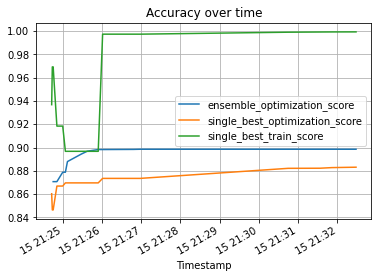

In [6]:
# Performance over time
cls.performance_over_time_.plot(
    x = 'Timestamp',
    kind = 'line',
    legend = True,
    title = 'Accuracy over time',
    grid = True)

To save the progress thus far, we can use Pytorch's function `torch.save` to store the trained model.

In [90]:
import torch
torch.save(cls, 'cls.pkl', pickle_protocol = 5)

If the pickled model needs to be accessed later, run the cell below.

In [3]:
import autosklearn
import torch
cls = torch.load('cls.pkl')

## Model insights

The contents of the model ensemble can be viewed below.

In [7]:
# Leaderboard
print(cls.leaderboard())

          rank  ensemble_weight                type      cost  duration
model_id                                                               
202          1             0.06  passive_aggressive  0.117718  5.733752
191          2             0.04  passive_aggressive  0.117862  6.450163
254          3             0.02  passive_aggressive  0.118517  4.847928
229          4             0.10  passive_aggressive  0.118709  5.259260
122          5             0.04  passive_aggressive  0.118836  5.268186
264          6             0.02  passive_aggressive  0.119124  5.533658
167          7             0.04  passive_aggressive  0.119587  4.350446
265          8             0.08  passive_aggressive  0.119875  3.974936
154          9             0.14  passive_aggressive  0.120514  5.708500
126         10             0.08  passive_aggressive  0.121057  6.371178
91          11             0.02  passive_aggressive  0.121473  4.237453
55          12             0.14  passive_aggressive  0.123007  5

In [49]:
# Retrieve the model id based on its leaderboard rank
rank = 1 # fill in the rank here
model_id = cls.leaderboard()[cls.leaderboard()['rank'] == rank].index[0]
model_id

202

In [58]:
# View the model's pipeline
cls.show_models()[model_id]

{'model_id': 202,
 'rank': 1,
 'cost': 0.11771802000447387,
 'ensemble_weight': 0.06,
 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f33b1941cd0>,
 'balancing': Balancing(random_state=42),
 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f33b31449d0>,
 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f33b3144af0>,
 'sklearn_classifier': None}

In [26]:
import PipelineProfiler
%pip show pipelineprofiler

Name: pipelineprofiler
Version: 0.1.18
Summary: Pipeline Profiler tool. Enables the exploration of D3M pipelines in Jupyter Notebooks
Home-page: https://github.com/VIDA-NYU/PipelineVis
Author: Jorge Piazentin Ono, Sonia Castelo, Roque Lopez, Enrico Bertini, Juliana Freire, Claudio Silva
Author-email: jorgehpo@nyu.edu
License: UNKNOWN
Location: /Users/tompham/Library/Python/3.10/lib/python/site-packages
Requires: networkx, notebook, numpy, python-dateutil, scikit-learn, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


## Use the trained model to make predictions

Process the test data similarly to the trained features `X_train`.

In [20]:
df_test = pd.read_csv(path/'test.csv', index_col = 'PassengerId')
df_test = df_test.drop('Name', axis = 1)
to_cat(df_test)
df_test.head()

Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
PassengerId                                                               
892               3    male  34.5      0      0   330911   7.8292   NaN   
893               3  female  47.0      1      0   363272   7.0000   NaN   
894               2    male  62.0      0      0   240276   9.6875   NaN   
895               3    male  27.0      0      0   315154   8.6625   NaN   
896               3  female  22.0      1      1  3101298  12.2875   NaN   

            Embarked  
PassengerId           
892                Q  
893                S  
894                Q  
895                S  
896                S

In [21]:
# Make prediction
prediction = cls.predict(df_test)

In [22]:
# Convert the prediction to dataframe from ndarry
subm = pd.DataFrame(prediction,
                    index = df_test.index,
                    columns = ['Survived'])

Save the prediction as a .csv file.

In [23]:
subm.to_csv('subm.csv')
# View the first few rows
!head subm.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1


Submit the prediction directly to the Kaggle competition. View the scores in [this webpage](https://www.kaggle.com/competitions/titanic/submissions).

In [39]:
# Submit to competition
from kaggle import api
api.competition_submit_cli('subm.csv', # file name
                           'auto-sklearn 2 - 10m', # version description
                           comp) # competition name

100%|██████████| 2.77k/2.77k [00:00<00:00, 5.35kB/s]


Successfully submitted to Titanic - Machine Learning from Disaster

This submission has an accuracy score of 79.186%, which is top 6% of all submissions. *Note: there are numerous [top predictions with 100% accuracy](https://www.kaggle.com/competitions/titanic/leaderboard) from cheating*.

## Feature importance

### Permutation feature importance

In [91]:
from sklearn.inspection import plot_partial_dependence, permutation_importance
import matplotlib.pyplot as plt

In [99]:
def importance(model: object = model,
               X: object = X_test,
               y: object = y_test,
               scoring: string = 'roc_auc',
               repeats: int = 10,
               n_jobs: int = -1):
    '''
    Calculate and plot the permutation importance of features.
    Required dependencies:
    from sklearn.inspection import plot_partial_dependence, permutation_importance
    import matplotlib.pyplot as plt
    '''
    # Calculate permutation importance
    r = permutation_importance(estimator = model,
                              X = X,
                              y = y,
                              scoring = scoring,
                              n_repeats = repeats,
                              n_jobs = n_jobs)
    
    # Plot the result
    fig = plt.figure(figsize = (16, 9))
    ax = fig.add_subplot(111)
    sort_idx = r.importances_mean.argsort()
    ax.boxplot(r.importances[sort_idx].T, labels = [X.columns[i] for i in sort_idx], vert = False)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(20)
    fig.tight_layout()

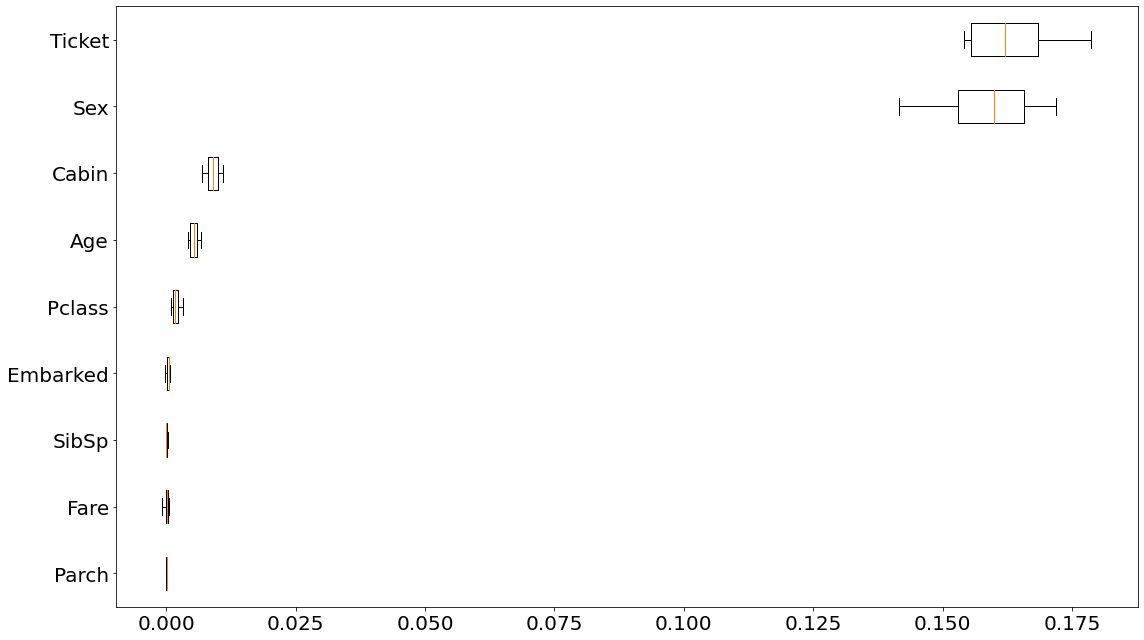

In [98]:
importance(model = cls,X = X_train, y = y_train)

### SHAP

In [16]:
import shap
print('shap version: ', shap.__version__)

shap version:  0.41.0


In [17]:
shap.initjs()

In [26]:
%%capture
explainer = shap.KernelExplainer(cls.predict_proba, shap.sample(X_train, 128), link = "identity")
shap_values = explainer.shap_values(X_train, nsamples = 10)

ValueError: When providing a numpy array to Auto-sklearn, the only valid dtypes are numerical ones. The provided data type <class 'numpy.object_'> is not supported.

In [19]:
shap.force_plot(base_value = explainer.expected_value,
               shap_values = shap_values[17],
               features = X_train.columns.to_list())

NameError: name 'explainer' is not defined

In [ ]:
print(shap_values.shape)